# Работа с целевой переменной
## Цель работы
Познакомиться с основными приемами обработки данных в отношении к целевой переменной: дискретизация, отбор признаков, устранение дисбаланса классов.

## Содержание работы
1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.
2. Постройте простую модель регрессии и оцените ее качество.
3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.
4. Постройте модель на оставшихся данных и оцените ее качество.
5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.
6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.
7. Загрузите датасет для классификации. Постройте распределение целевой переменной.
8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.
9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.
10. Выравняйте распределение классов путем оверсемплинга с повторением

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите первый датасет для регрессии и познакомьтесь с его структурой.

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
df = fetch_openml("mtp", version=1)
df.data.head()

,oz1,oz2,oz3,oz4,oz5,oz6,oz7,oz8,oz9,oz10,...,oz193,oz194,oz195,oz196,oz197,oz198,oz199,oz200,oz201,oz202
0,0.076923,0.325000,0.035088,0.200000,0.162112,0.194562,0.003900,0.060606,0.166667,0.045872,...,0.013874,0.071602,0.056880,0.179132,0.505899,0.039213,0.091327,0.321109,0.127564,0.188387
1,0.230769,0.375000,0.042105,0.333333,0.464191,0.622795,0.077623,0.373737,0.305556,0.192661,...,0.006342,0.186056,0.287438,0.384236,0.683820,0.326584,0.117990,0.456665,0.475618,0.401935
2,0.269231,0.437500,0.052632,0.333333,0.506556,0.531840,0.054374,0.212121,0.333333,0.229358,...,0.005018,0.179544,0.117431,0.384550,0.499219,0.204885,0.155967,0.360441,0.497968,0.407742
3,0.153846,0.357143,0.039474,0.266667,0.352880,0.394131,0.019654,0.171717,0.277778,0.091743,...,0.004801,0.091771,0.145349,0.243064,0.630533,0.023469,0.124430,0.336023,0.134458,0.252258
4,0.153846,0.357143,0.039474,0.266667,0.350523,0.320546,0.013154,0.101010,0.166667,0.110092,...,0.011166,0.130755,0.067583,0.250832,0.516053,0.111398,0.125693,0.332113,0.295913,0.253548


In [4]:
df.target.head()

0    0.000000
1    0.017173
2    0.035667
3    0.043593
4    0.044914
Name: oz203, dtype: float64

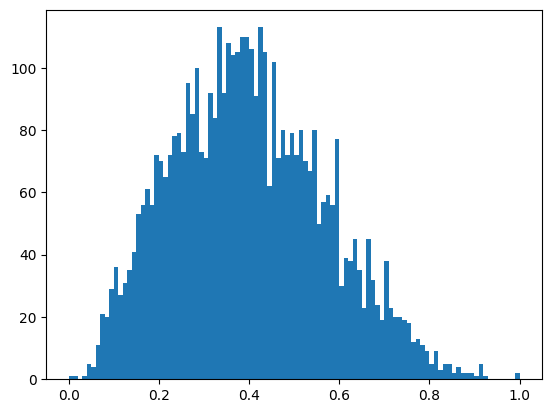

In [5]:
plt.hist(df.target, 100)
_ = plt.plot()

### 2. Постройте простую модель регрессии и оцените ее качество.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42)

In [8]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)

LinearRegression()

In [9]:
bl_score = baseline.score(X_test, y_test)
bl_score

-1.6511340767493534

In [10]:
y_pred = baseline.predict(X_test)

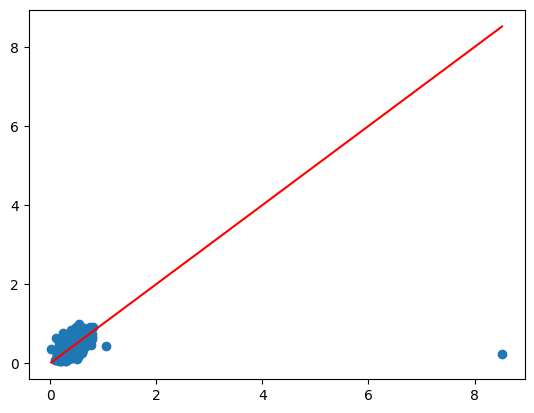

In [11]:
plt.scatter(y_pred, y_test)
min_val = min(y_pred.min(), y_test.min())
max_val = max(y_pred.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], c='r')

### 3. Отберите признаки, наиболее сильно влияющие на значение целевой переменной.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rf = RandomForestRegressor(n_estimators=15).fit(X_train, y_train)

Text(0.5, 0, 'Feature Importance')

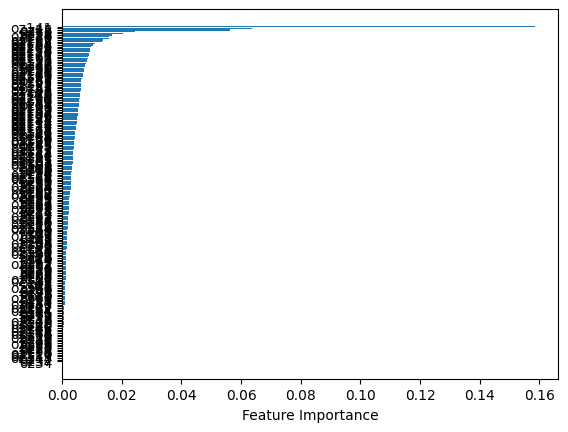

In [14]:
sort = rf.feature_importances_.argsort()
plt.barh(df.data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

In [15]:
rf.feature_importances_[sort][-10:]

array([0.01341592, 0.01359951, 0.01554103, 0.01582105, 0.01677411,
       0.02023006, 0.02454673, 0.05611144, 0.06361319, 0.15841633])

In [16]:
df.data.columns[sort][-10:]

Index(['oz155', 'oz197', 'oz112', 'oz20', 'oz137', 'oz18', 'oz35', 'oz48',
       'oz15', 'oz141'],
      dtype='object')

In [17]:
trimmed = df.data[df.data.columns[sort][-20:]]
trimmed.head()

,oz159,oz161,oz162,oz117,oz170,oz153,oz158,oz201,oz198,oz154,oz155,oz197,oz112,oz20,oz137,oz18,oz35,oz48,oz15,oz141
0,0.929724,0.382067,0.319206,0.000000,0.866163,0.052296,0.800120,0.127564,0.039213,0.030205,0.752291,0.505899,0.000000,0.000000,0.000000,0.0625,0.0,0.312855,0.000000,0.041308
1,0.944542,0.383458,0.306084,0.311793,0.866069,0.060922,0.791224,0.475618,0.326584,0.016908,0.745984,0.683820,0.222222,0.242424,0.278945,0.0625,0.4,0.297041,0.282828,0.212274
2,0.946121,0.382596,0.406309,0.000000,0.866224,0.072628,0.798276,0.497968,0.204885,0.006922,0.753298,0.499219,0.000000,0.388889,0.000000,0.1250,0.0,0.288557,0.388889,0.063643
3,0.945087,0.382776,0.327848,0.000000,0.865988,0.054593,0.800965,0.134458,0.023469,0.001240,0.767469,0.630533,0.000000,0.095238,0.039437,0.0000,0.1,0.310692,0.111111,0.031193
4,0.941644,0.383539,0.329857,0.000000,0.866283,0.045400,0.802893,0.295913,0.111398,0.011829,0.741548,0.516053,0.000000,0.260870,0.000000,0.0625,0.0,0.286581,0.304348,0.063643


### 4. Постройте модель на оставшихся данных и оцените ее качество.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(trimmed, df.target, test_size=0.25, random_state=42)

In [19]:
better = LinearRegression()
better.fit(X_train, y_train)

LinearRegression()

In [20]:
print(bl_score)
better.score(X_test, y_test)

-1.6511340767493534


0.36809257655998906

In [21]:
y_pred = better.predict(X_test)

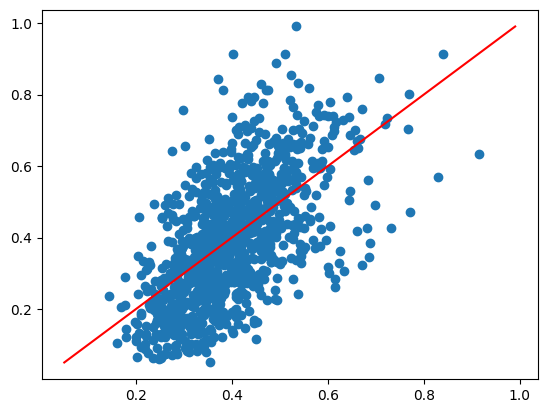

In [22]:
plt.scatter(y_pred, y_test)
min_val = min(y_pred.min(), y_test.min())
max_val = max(y_pred.max(), y_test.max())
plt.plot([min_val, max_val], [min_val, max_val], c='r')

### 5. Загрузите второй датасет для регрессии и постройте распределение целевой переменной.

In [23]:
df = fetch_openml("balance-scale", version=1)

In [24]:
df.data.head()

,left-weight,left-distance,right-weight,right-distance
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


<Axes: xlabel='class', ylabel='Count'>

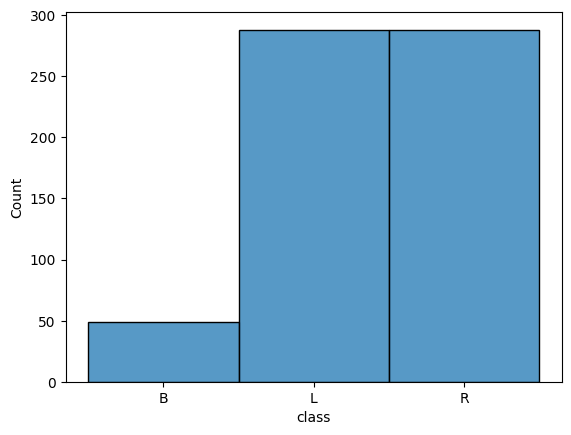

In [25]:
sns.histplot(df.target)

### 6. Сгруппируйте значения целевой переменной в категории. Постройте получившееся распределение.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.25, random_state=42, stratify=df.target)

<Axes: xlabel='class', ylabel='Count'>

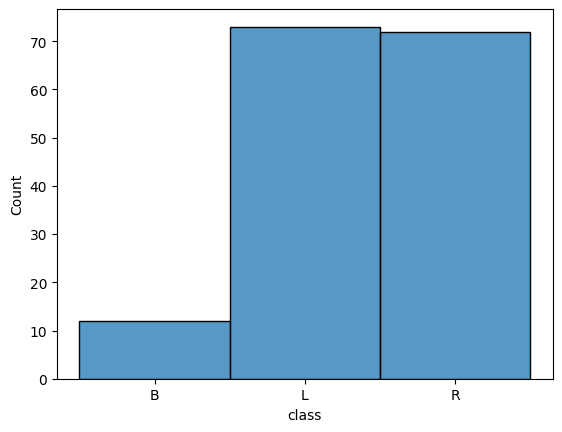

In [27]:
sns.histplot(y_test)

### 7. Загрузите датасет для классификации. Постройте распределение целевой переменной.

уже загрузил

### 8. Разделите датасет на тестовую и обучающую выборки, постройте и оцените baseline модель классификации.

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
baseline = LogisticRegression()
baseline.fit(X_train, y_train)

LogisticRegression()

In [30]:
bl_score = baseline.score(X_test, y_test)
bl_score

0.8598726114649682

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(classification_report(y_test, baseline.predict(X_test)))

              precision    recall  f1-score   support

           B       0.00      0.00      0.00        12
           L       0.87      0.92      0.89        73
           R       0.86      0.94      0.90        72

    accuracy                           0.86       157
   macro avg       0.58      0.62      0.60       157
weighted avg       0.80      0.86      0.83       157



Фактически, модель вообще ни разу не распознала правильно объект миноритарного класса. Поэтому невзвешенная оценка качества модели на самом деле ближе к отметке в 60%. Это не очень удовлетворительный результат.

In [33]:
print(confusion_matrix(y_test, baseline.predict(X_test)))

[[ 0  6  6]
 [ 1 67  5]
 [ 0  4 68]]


### 9. Постройте ту же модель с применением весов классов. Сравните ее качество, сделайте выводы.

In [34]:
from sklearn.utils.class_weight import compute_class_weight

In [35]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{'B': np.float64(4.216216216216216),
 'L': np.float64(0.7255813953488373),
 'R': np.float64(0.7222222222222222)}

In [36]:
weighted = LogisticRegression(class_weight=class_weights)
weighted.fit(X_train, y_train)
print(bl_score)
weighted.score(X_test, y_test)

0.8598726114649682


0.9235668789808917

In [37]:
print(classification_report(y_test, weighted.predict(X_test)))

              precision    recall  f1-score   support

           B       0.61      0.92      0.73        12
           L       0.97      0.92      0.94        73
           R       0.96      0.93      0.94        72

    accuracy                           0.92       157
   macro avg       0.85      0.92      0.87       157
weighted avg       0.94      0.92      0.93       157



In [38]:
print(confusion_matrix(y_test, weighted.predict(X_test)))

[[11  0  1]
 [ 4 67  2]
 [ 3  2 67]]


### 10. Выравняйте распределение классов путем оверсемплинга с повторением

In [39]:
y_train.value_counts()

class
R    216
L    215
B     37
Name: count, dtype: int64

In [40]:
X_train["target"] = y_train

In [41]:
oversampled = X_train[X_train.target == "B"].sample(n=216-37, replace=True, ignore_index=True)

In [42]:
oversampled = pd.concat([X_train, oversampled])
print(oversampled.shape)
oversampled.head()

(647, 5)


,left-weight,left-distance,right-weight,right-distance,target
262,3,1,3,3,R
401,4,2,1,2,L
174,2,2,5,5,R
81,1,4,2,2,B
36,1,2,3,2,R


In [43]:
y_train_OS = oversampled.target
X_train_OS = oversampled.drop(["target"], axis=1)

In [44]:
OSmodel = LogisticRegression()
OSmodel.fit(X_train_OS, y_train_OS)
print(bl_score)
OSmodel.score(X_test, y_test)

0.8598726114649682


0.9235668789808917